In [430]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx

In [370]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [371]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [372]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [373]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [374]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [375]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
127,21000194,None,1/1/2021,1:25:25AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 11 147 NB,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
131,21000199,None,1/1/2021,1:29:04AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 147S AND BLACKWELL ST,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
210,21000322,None,1/1/2021,3:56:22AM,Self Initiated,5,DIRECTED PATROL,3407 3RD FORK RD,0,0,None,None,Cancelled,1,POINT (-85.56829 33.56815)
255,21000381,None,1/1/2021,6:14:49AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
274,21000409,None,1/1/2021,7:03:23AM,Self Initiated,4,FOLLOW UP,SS1,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330699,21477803,21045233,12/31/2021,6:00:48PM,Mobil,4,ATTEMPT TO LOCATE,UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330858,21478039,None,12/31/2021,8:24:41PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330963,21478179,None,12/31/2021,10:06:37PM,Self Initiated,4,PROPERTY CHECK,1223 HOMECOMING WY,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
331057,21478324,None,12/31/2021,11:45:43PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 17900 I85 S,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)


In [376]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [377]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


In [378]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [379]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122782 entries, 0 to 331065
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122782 non-null  int64   
 1   Case Numbe  34312 non-null   object  
 2   Call Date   122782 non-null  object  
 3   Call Time   122782 non-null  object  
 4   Source      122782 non-null  object  
 5   Priority    122244 non-null  object  
 6   Nature      122782 non-null  object  
 7   Address     122782 non-null  object  
 8   X           122782 non-null  int64   
 9   Y           122782 non-null  int64   
 10  District    122127 non-null  object  
 11  Beat        122107 non-null  object  
 12  Dispositio  122782 non-null  object  
 13  Cancelled   122782 non-null  int64   
 14  geometry    122782 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [380]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 11 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    83 non-null     int64   
 1   PERIMETER   83 non-null     float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     83 non-null     object  
 5   LAWBEAT     83 non-null     int64   
 6   CAD         83 non-null     object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  83 non-null     float64 
 9   ShapeSTLen  83 non-null     float64 
 10  geometry    83 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 7.8+ KB


In [381]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,...,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
81,21000125,None,1/1/2021,12:46:53AM,Phone Call,3,SOUND OF SHOTS,PEBBLESTONE DR/KNIGHTWOOD DR,2056514,821822,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1117,21001615,21000126,1/2/2021,11:30:25AM,Wireless 911 Call,4,DAMAGE TO PROPERTY,0 AUTUMN LEAF LN,2053898,824503,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1226,21001780,21000150,1/2/2021,2:12:39PM,Wireless 911 Call,4,LARCENY,3600 CARDINAL LAKE DR,2056795,825199,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1319,21001917,None,1/2/2021,4:50:21PM,Phone Call,3,SUSPICIOUS PERSON,ESTERBROOK CT/PEBBLESTONE DR,2055583,819061,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286528,21411398,None,11/10/2021,12:57:06PM,Wireless 911 Call,3,ASSAULT,3000 MT SINAI RD,2002584,814666,...,69,4025.813965,I,yes,D3,321,321,None,9.559212e+05,4025.813820
190058,21266548,None,7/25/2021,2:51:58PM,Wireless 911 Call,2,URGENT WELFARE CHECK,5500 LEESVILLE RD,2060394,797620,...,98,1949.288940,I,no,D1,124,124,None,1.472133e+05,1949.288667
264761,21378037,None,10/16/2021,2:45:39AM,Phone Call,2,ASSIST EMS,5500 LEESVILLE RD,2060372,797622,...,98,1949.288940,I,no,D1,124,124,None,1.472133e+05,1949.288667
294180,21423205,21039914,11/19/2021,5:41:45PM,Wireless 911 Call,3,HIT AND RUN,FLETCHERS CHAPEL RD/BRIGHTWOOD LN,2058319,823738,...,48,8026.809082,I,no,D1,121,121,None,2.376268e+06,8026.808931


In [382]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 121813 entries, 0 to 317694
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Event Numb   121813 non-null  int64   
 1   Case Numbe   33722 non-null   object  
 2   Call Date    121813 non-null  object  
 3   Call Time    121813 non-null  object  
 4   Source       121813 non-null  object  
 5   Priority     121708 non-null  object  
 6   Nature       121813 non-null  object  
 7   Address      121813 non-null  object  
 8   X            121813 non-null  int64   
 9   Y            121813 non-null  int64   
 10  District     121724 non-null  object  
 11  Beat         121723 non-null  object  
 12  Dispositio   121813 non-null  object  
 13  Cancelled    121813 non-null  int64   
 14  geometry     121813 non-null  geometry
 15  index_right  121813 non-null  int64   
 16  OBJECTID     121813 non-null  int64   
 17  PERIMETER    121813 non-null  float64 
 

In [383]:
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of      OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  LAWBEAT  CAD  \
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
..        ...           ...    ...        ...     ...      ...  ...   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   

    GIS_DataA1    ShapeSTAre    ShapeSTLen  ...             Source  Priority  \
11        None  7.014559e+07  94210

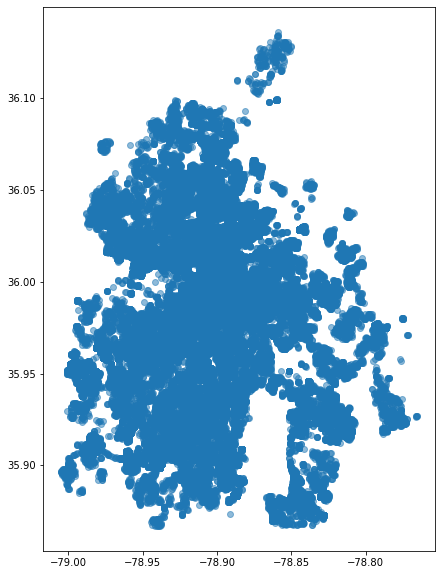

In [384]:
#Plot the dpd_w_policebeats data
fig, ax = plt.subplots(figsize = (10,10))
dpd_w_policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

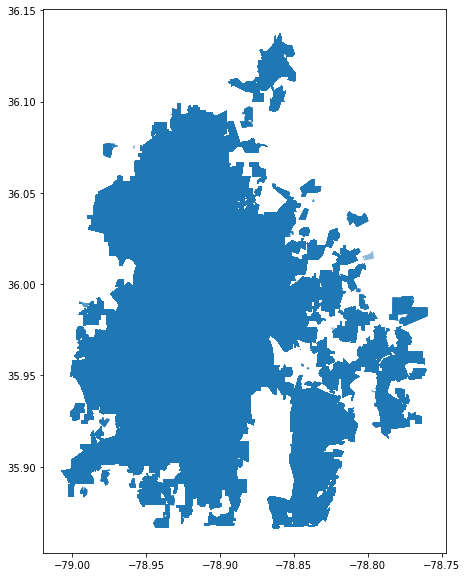

In [385]:
#Plot the policebeats_w_dpd data
fig, ax = plt.subplots(figsize = (10,10))
policebeats_w_dpd.plot(ax = ax, alpha = 0.5)
plt.show()

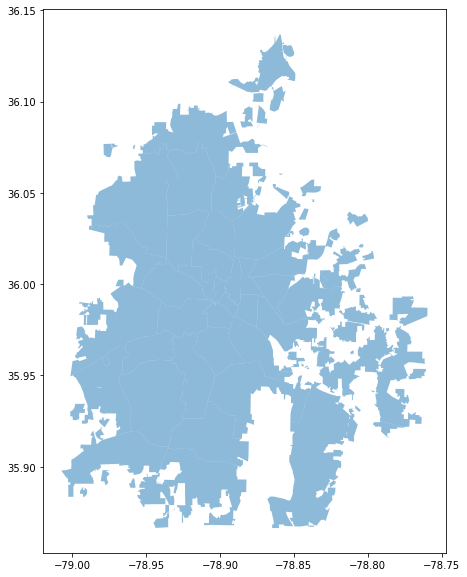

In [386]:
# Plot the beat data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

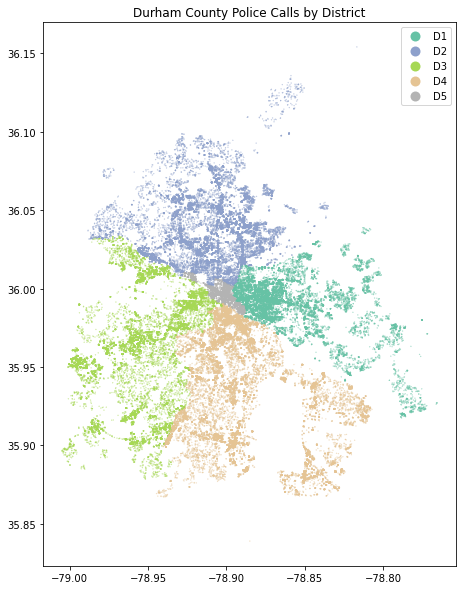

In [417]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.show()

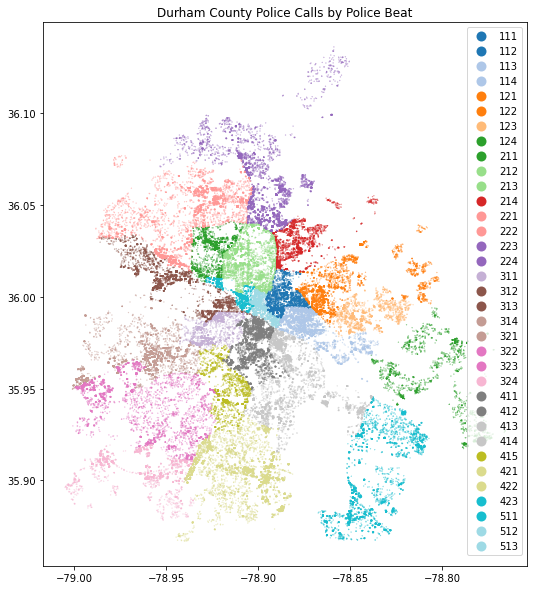

In [428]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.show()

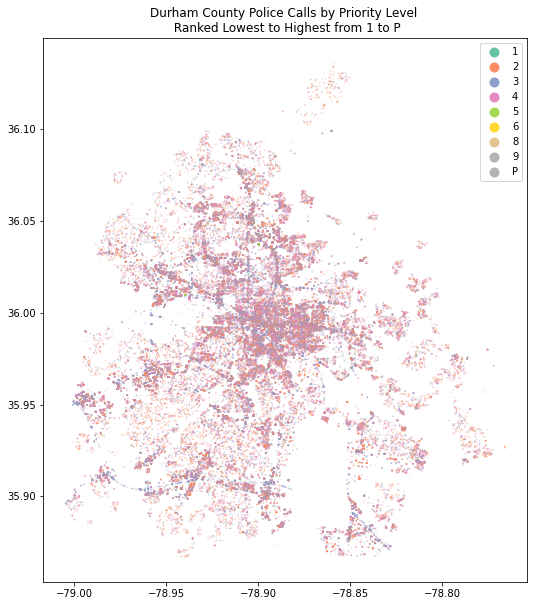

In [426]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.show()

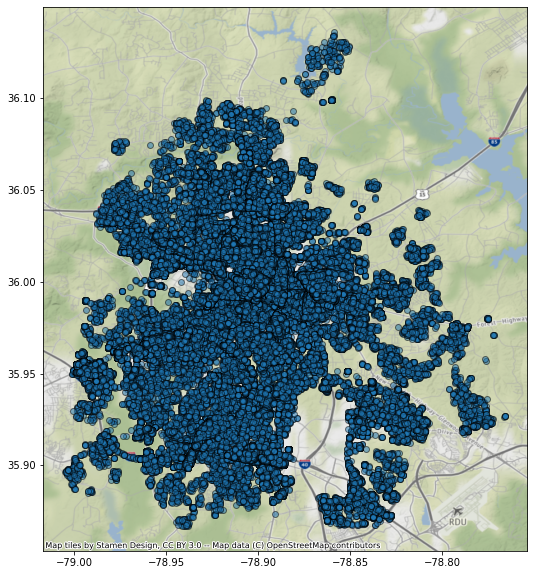

In [438]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

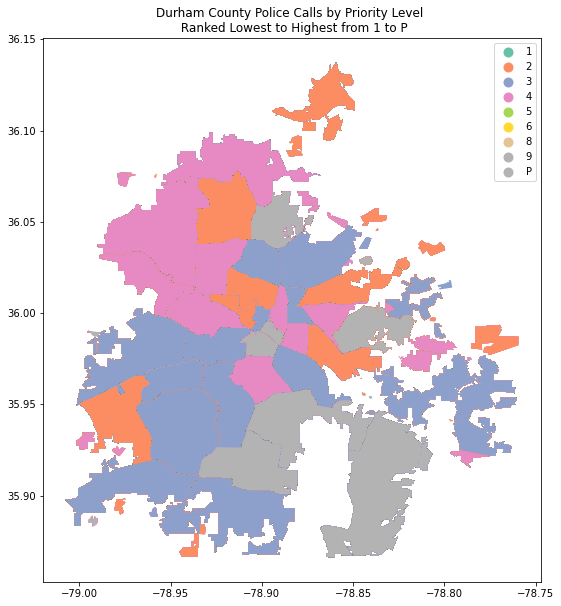

In [ ]:
#Plotting the policebeats_w_dpd data by priority level
fig, ax = plt.subplots(figsize = (10,10))

policebeats_w_dpd.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.show()

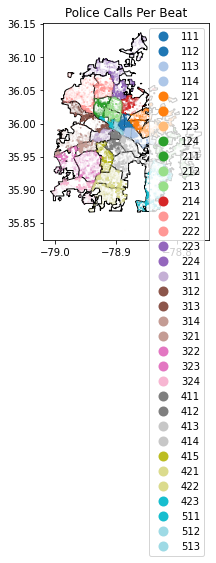

In [415]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.show()

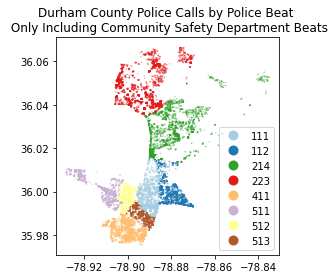

In [420]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.show()

In [390]:
#Count the calls in each beat
dpd_w_policebeats.groupby("Beat")["Beat"].count()

Beat
111    2730
112    2662
113    3095
114    3041
121    2771
122    3492
123    2890
124    2030
211    4174
212    3404
213    4018
214    3817
221    4273
222    3348
223    5329
224    2867
311    2848
312    2963
313    3756
314    3381
321    3333
322    2626
323    3077
324    3773
411    3926
412    3462
413    3660
414    3587
415    3124
421    4677
422    4633
423    5844
511    2564
512    2931
513    3617
Name: Beat, dtype: int64

In [391]:
policebeats_w_dpd['Pcall'] = np.where(policebeats_w_dpd['Priority']!= '[P]', True, False)

In [ ]:
policebeats_w_dpd['Count'] = np.where(policebeats_w_dpd[])

In [362]:
policebeats_w_dpd_new = policebeats_w_dpd[['OBJECTID', 'PERIMETER', 'LAWBEAT', 'CAD', 'ShapeSTAre', 'ShapeSTLen', 'Priority', 'Pcall', 'geometry']]
policebeats_w_dpd_new.head()

,OBJECTID,PERIMETER,LAWBEAT,CAD,ShapeSTAre,ShapeSTLen,Priority,Pcall,geometry
11,12,94210.453125,224,224,7.014559e+07,94210.45314,2,True,"POLYGON ((-78.86340 36.13179, -78.86340 36.131..."
11,12,94210.453125,224,224,7.014559e+07,94210.45314,2,True,"POLYGON ((-78.86340 36.13179, -78.86340 36.131..."
11,12,94210.453125,224,224,7.014559e+07,94210.45314,3,True,"POLYGON ((-78.86340 36.13179, -78.86340 36.131..."
11,12,94210.453125,224,224,7.014559e+07,94210.45314,2,True,"POLYGON ((-78.86340 36.13179, -78.86340 36.131..."
11,12,94210.453125,224,224,7.014559e+07,94210.45314,3,True,"POLYGON ((-78.86340 36.13179, -78.86340 36.131..."


In [392]:
#Find the beat with highest proportion of priority calls
Pcalls = dpdcalls.loc[(dpdcalls["Priority"] == "P")].copy()

In [393]:
#Create data frame with count of 'P' priority calls
Ppriorities = gpd.GeoDataFrame(Pcalls.groupby("Beat").agg({'Event Numb':'count'}))
Ppriorities.rename(columns=({'Event Numb':'Count_of_Pcalls'}),inplace = True)
Ppriorities.head()

,Count_of_Pcalls
Beat,
111,236
112,216
113,274
114,192
121,209


In [394]:
#Create data frame with count of total calls
allpriorities = gpd.GeoDataFrame(dpdcalls.groupby("Beat").agg({'Event Numb':'count'}))
allpriorities.rename(columns=({'Event Numb':'Count_of_calls'}),inplace = True)
allpriorities.head()

,Count_of_calls
Beat,
111,2730
112,2662
113,3095
114,3059
121,2812


In [395]:
#Create a data frame with both counts
bothtypes = allpriorities.join(Ppriorities)
bothtypes.sort_values(by='Count_of_Pcalls', inplace=True, ascending=False)
bothtypes.head(6)

,Count_of_calls,Count_of_Pcalls
Beat,,
223,5371,437
421,4679,388
411,3926,374
423,5895,364
422,4647,355
221,4274,342


In [399]:
#Add a column to calculate the proportion of 'P' calls
bothtypes['Prop_of_Pcalls']= bothtypes['Count_of_Pcalls'] / bothtypes['Count_of_calls']
bothtypes.sort_values(by='Prop_of_Pcalls', inplace=True, ascending=False)
bothtypes.head(6)

,Count_of_calls,Count_of_Pcalls,Prop_of_Pcalls
Beat,,,
411,3926,374,0.095262
113,3095,274,0.088530
122,3494,303,0.086720
111,2730,236,0.086447
421,4679,388,0.082924
223,5371,437,0.081363


In [427]:
#Create a bar graph to show the proportion of high priority calls per community safety beat
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe2 = bothtypes.loc[bothtypes['Beat'].isin(commsafe_list)].copy()

# Proportion_Calls = bothtypes

bothtypes.plot.bar()

KeyError: 'Beat'

In [ ]:
#Merge population data